***12.1 # 6***


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
# -- origin calculation
def findSST(df: pd.DataFrame):
    sum = 0
    grandMean = findGrandMean(df)
    for columnName in df.columns:
        column = df[columnName]
        sum = column.size*(column.mean() - grandMean)**2 + sum
    return sum

# -- origin calculation 
def findTSS (df: pd.DataFrame):
    sum = 0
    grandMean = findGrandMean(df)
    for columnName in df.columns:
        for element in df[columnName]:
            sum = (element - grandMean)**2 + sum
    return sum

# -- origin calculation
def findMSE (df: pd.DataFrame):
    numeratorSum = 0
    denominator = (df.size - df.shape[1])
    for columnName in df.columns:
        columnMean = df[columnName].mean()
        for element in df[columnName]:
            numeratorSum = ((element - columnMean) ** 2) + numeratorSum
    return numeratorSum / denominator

def findSSE( df: pd.DataFrame):
    mse=findMSE(df)
    return mse*(df.size - df.shape[1])

def findMST (df: pd.DataFrame):
    return findSST(df) / (df.shape[1] - 1)

def findF (df: pd.DataFrame):
    return findMST(df) / findMSE(df)

def findGrandMean(df: pd.DataFrame):
    sum = 0
    for columnName in df.columns:
        for element in df[columnName]:
            sum = element + sum
    return sum / df.size

def generateANOVAFrame (df: pd.DataFrame):
    treaments = df.columns.size - 1
    total = df.size - 1
    error = total - treaments 
    sst = round(findSST(df),3)
    sse = round(findSSE(df),3)
    tss = round(findTSS(df),3)
    mst = round(findMST(df),3)
    mse = round(findMSE(df),3)
    f_value = round(findF(df),3)
    p_value = round(f_oneway(*[df[column] for column in df.columns]).pvalue, 5)

    return pd.DataFrame({
        'source' : ['Treatments' , 'Error' , 'Total'],
        'df' : [treaments, error, total],
        'Sum of Squares' : [sst, sse, tss ],
        'Mean Squares' : [mst, mse , None],
        'F' : [f_value, None, None],
        'P-value' : [p_value,None, None]
    }).set_index('source')

def makeDetermination(df: pd.DataFrame, alpha = 0.05 ):
    p_value = round(f_oneway(*[df[column] for column in df.columns]).pvalue, 5)
    if p_value < alpha:
        return (str(alpha) + " > " + str(p_value) +  ": Reject Null Hypothesis at α=" + str(alpha))
    return (str(alpha) + " < " + str(p_value) +  ": Fail to Reject Null Hypothesis at α=" + str(alpha))

def plotLevene (df: pd.DataFrame , alpha = 0.05):
    # Calculate levene test
    res = stats.levene(*[df[columnName] for columnName in df.columns], proportiontocut=alpha)

    def plot(ax):  # we'll reuse this
        ax.plot(val, pdf, color='C0')
        ax.set_title("Levene Test Null Distribution")
        ax.set_xlabel("statistic")
        ax.set_ylabel("probability density")
        ax.set_xlim(0, 5)
        ax.set_ylim(0, 1)

    k, n = df.shape[1], df.size   # number of samples, total number of observations
    dist = stats.f(dfn=k-1, dfd=n-k)
    val = np.linspace(0, 5, 100)
    pdf = dist.pdf(val)
    fig, ax = plt.subplots(figsize=(8, 5))
    
    plot(ax)
    pvalue = dist.sf(res.statistic)
    annotation = (f'p-value={pvalue:.3f}\n(shaded area)')
    props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
    _ = ax.annotate(annotation, (1.5, 0.22), (2.25, 0.3), arrowprops=props)
    i = val >= res.statistic
    ax.fill_between(val[i], y1=0, y2=pdf[i], color='C0')
    plt.show()

13.287878787878784


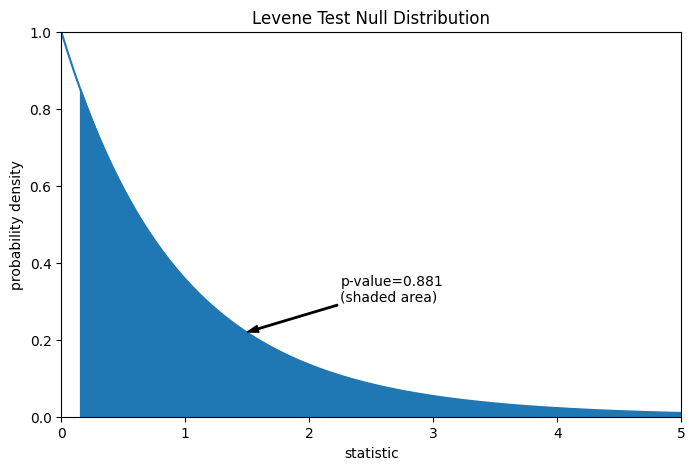

In [ ]:
df1216 = pd.DataFrame({
    "strategy1" : [3,6,7,4,6,7,10,6,15,8,9,16],
    "strategy2" : [2,5,5,3,7,8,6,4,10,6,9,12],
    "strategy3" : [4,2,5,6,6,7,9,8,14,8,7,16]
})
print(findMSE(df1216))
plotLevene(df1216)

***12.1 Problem 20***

In [10]:
df12120 = pd.DataFrame({
    'day' : ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    'firstShift' : [140,181,127,172,161,152,173],
    'secondShift' : [168,224,162,182,219,171,217],
    'thirdShift' : [77,123,77,101,147,145,111]
}).set_index('day')

In [11]:
sum = 0
for columnName in df12120.columns:
    sum = df12120[columnName].mean() + sum
print(str(sum/df12120.shape[1]))

153.80952380952382


In [12]:
print(df12120.shape[0])

7


In [13]:
print(df12120.shape[1])

3


21


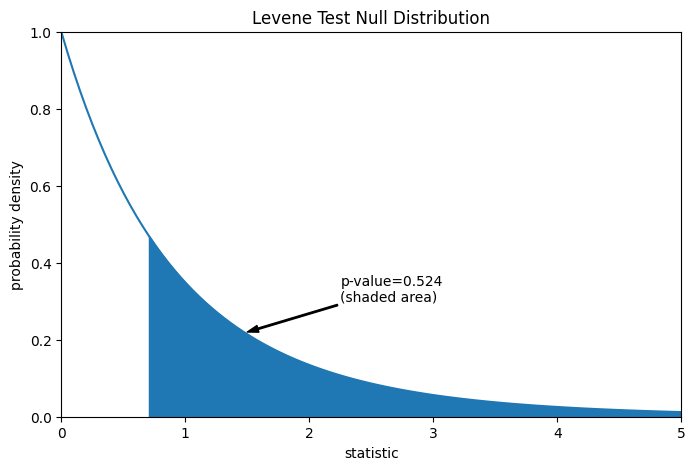

In [14]:
print(df12120.size)
plotLevene(df12120)

***12.3 Problem 10***

            df  Sum of Squares  Mean Squares       F  P-value
source                                                       
Treatments   3           775.0       258.333  27.928      0.0
Error       16           148.0         9.250     NaN      NaN
Total       19           923.0           NaN     NaN      NaN
0.1 > 0.0: Reject Null Hypothesis at α=0.1


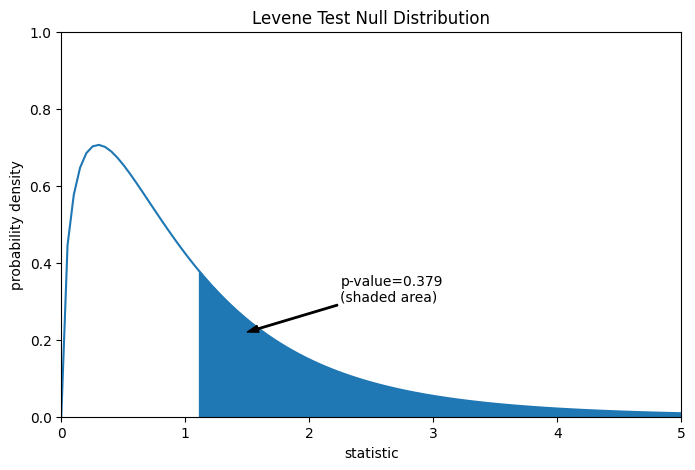

In [15]:
df12310 = pd.DataFrame({
    'minivanA': [150,152,151,149,153],
    'minivanB': [153,150,156,151,155],
    'minivanC' : [155,150,157,158,155],
    'minivanD': [167,164,169,162,173]
})

print(generateANOVAFrame(df12310))
print(makeDetermination(df12310,0.10))
plotLevene(df12310)

***Problem 12.3 # 13***

            df  Sum of Squares  Mean Squares      F  P-value
source                                                      
Treatments   2         422.222       211.111  4.471  0.06476
Error        6         283.333        47.222    NaN      NaN
Total        8         705.556           NaN    NaN      NaN


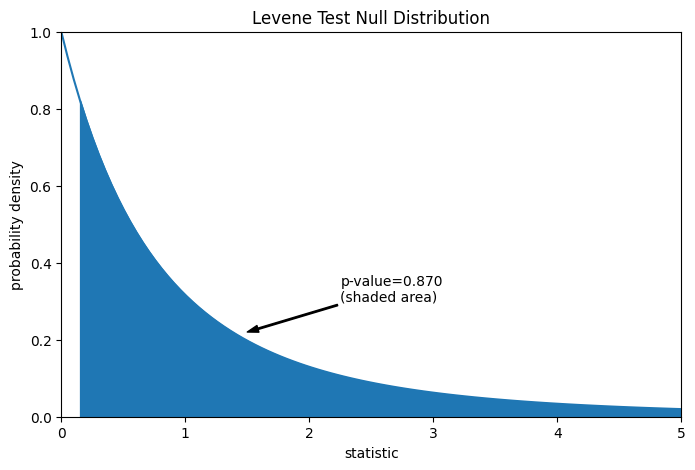

In [16]:
df12313 = pd.DataFrame({
    'Workout#1' : [180,185,170],
    'Workout#2': [160,170,175],
    'Workout#3': [185,190,180]
})
print(generateANOVAFrame(df12313))
plotLevene(df12313)

***Problem 12.3 # 15***

            df  Sum of Squares  Mean Squares      F  P-value
source                                                      
Treatments   2           4.098         2.049  5.101  0.01757
Error       18           7.230         0.402    NaN      NaN
Total       20          11.328           NaN    NaN      NaN
0.1 > 0.01757: Reject Null Hypothesis at α=0.1


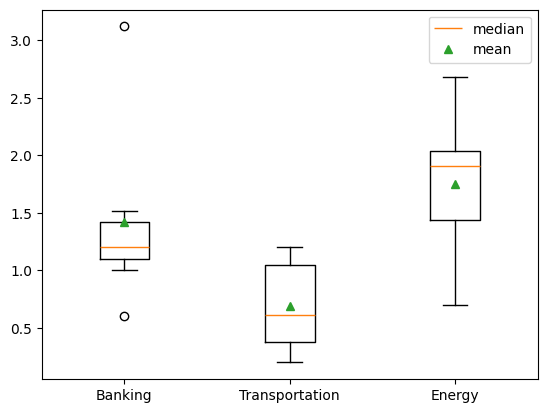

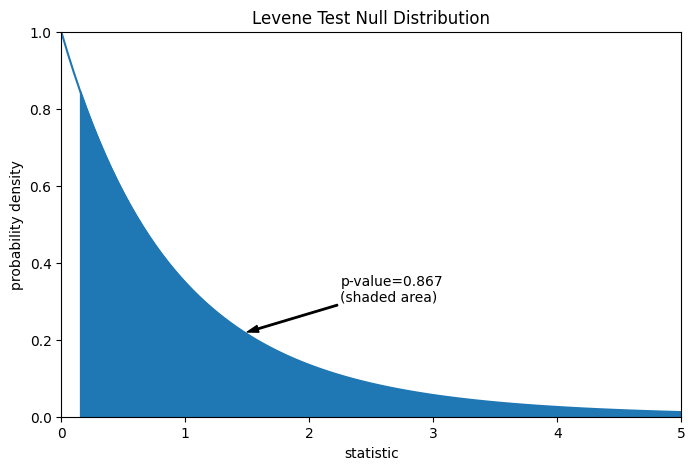

In [ ]:
df12315 = pd.DataFrame({
    'Banking' : [1.52, 3.12,1.32,0.6,1.2,1,1.19],
    'Transportation' : [1,1.2,0.2,0.4,1.09,0.61,0.35],
    'Energy' : [2.08,2.68,0.7,2,1.91,1.6,1.28]
})

print(generateANOVAFrame(df12315))
print(makeDetermination(df12315,alpha=0.10))
bp = plt.boxplot(df12315, showmeans=True, labels=df12315.columns)
plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'])
plotLevene(df12315, alpha=0.10)